In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
import warnings
warnings.filterwarnings('ignore')

In [228]:
df = pd.read_csv("C:\\Users\\91805\\Downloads\\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [229]:
df.shape

(545, 13)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [231]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [232]:
df.describe().round(2)

,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.69
std,1870439.62,2170.14,0.74,0.50,0.87,0.86
min,1750000.00,1650.00,1.00,1.00,1.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00
max,13300000.00,16200.00,6.00,4.00,4.00,3.00


In [233]:
#total null values
df.isnull().sum().sum()

0

In [234]:
#total NA values
df.isna().sum().sum()

0

<Axes: >

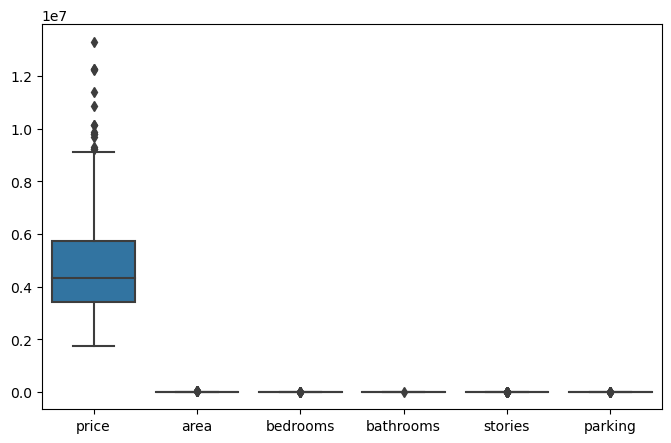

In [235]:
#identifying and removing outliers
plt.figure(figsize = (8,5))
sns.boxplot(df)

In [236]:
numeric_columns = df.select_dtypes(include='number')
numeric_columns

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


price


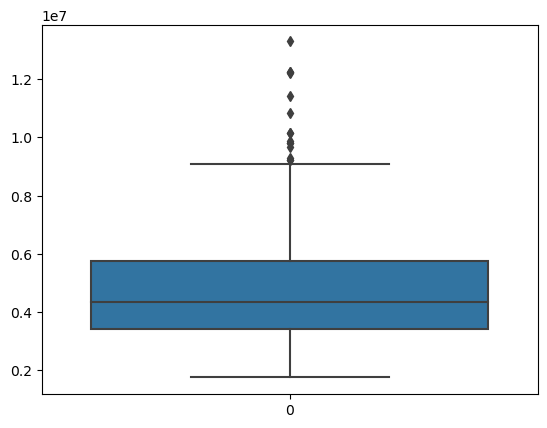

area


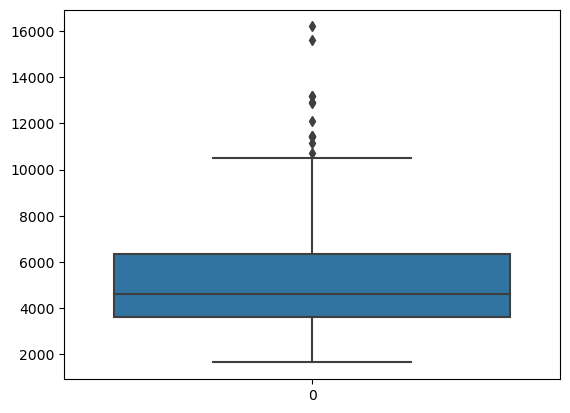

bedrooms


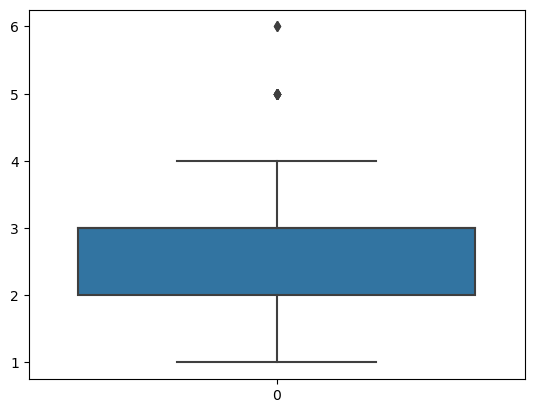

bathrooms


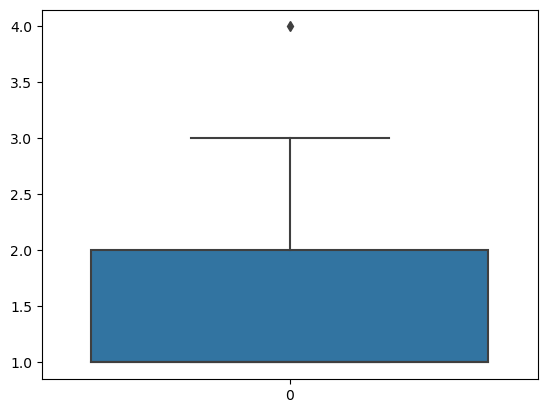

stories


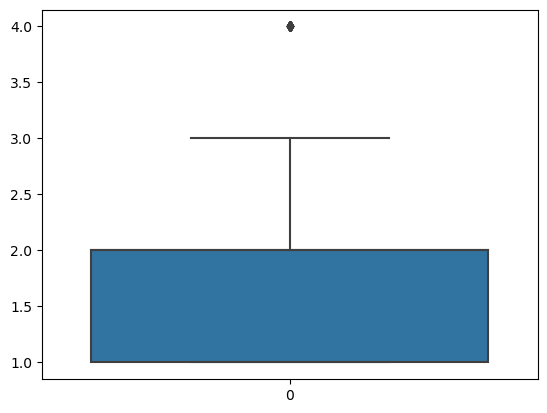

parking


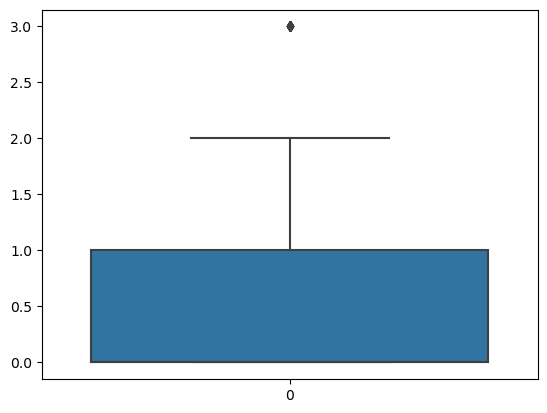

In [237]:
#individual boxplots of numerical columns to find outliers
for col in numeric_columns:
    print(col)
    sns.boxplot(df[col])
    plt.show()

In [239]:
quartiles = df.quantile([0.25,0.5,0.75])
quartiles

,price,area,bedrooms,bathrooms,stories,parking
0.25,3430000.0,3600.0,2.0,1.0,1.0,0.0
0.50,4340000.0,4600.0,3.0,1.0,2.0,0.0
0.75,5740000.0,6360.0,3.0,2.0,2.0,1.0


In [240]:
IQR = quartiles.loc[0.75] - quartiles.loc[0.25]
print(IQR)

price        2310000.0
area            2760.0
bedrooms           1.0
bathrooms          1.0
stories            1.0
parking            1.0
dtype: float64


In [241]:
def remove_outliers(column):
    Q1 = quartiles[column].loc[0.25]
    Q3 = quartiles[column].loc[0.75]
    lower_bound = Q1 - 1.5 * IQR[column]
    upper_bound = Q3 + 1.5 * IQR[column]
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [242]:
for col in numeric_columns:
    df = remove_outliers(col)

In [243]:
#after removing outliers
df.shape

(463, 13)

In [244]:
correlation_matrix = df.corr()
correlation_matrix

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.506596,0.337368,0.410914,0.233379,0.328241
area,0.506596,1.000000,0.102033,0.116276,-0.098621,0.294469
bedrooms,0.337368,0.102033,1.000000,0.339824,0.469634,0.096401
bathrooms,0.410914,0.116276,0.339824,1.000000,0.197759,0.114545
stories,0.233379,-0.098621,0.469634,0.197759,1.000000,-0.068653
parking,0.328241,0.294469,0.096401,0.114545,-0.068653,1.000000


<Axes: >

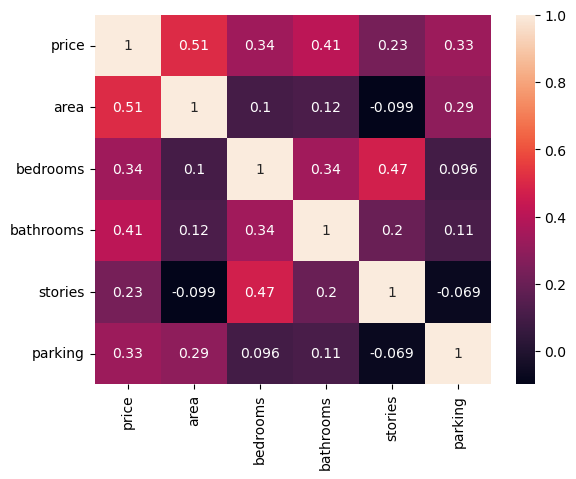

In [245]:
sns.heatmap(correlation_matrix , annot = True)

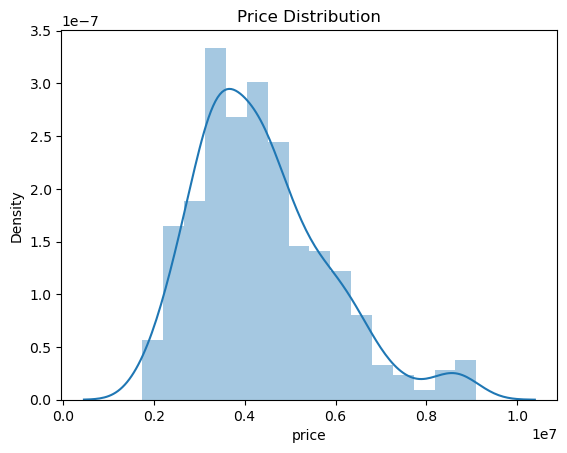

In [246]:
sns.distplot(df['price'])
plt.title('Price Distribution')
plt.show()

3    259
2    132
4     70
1      2
Name: bedrooms, dtype: int64


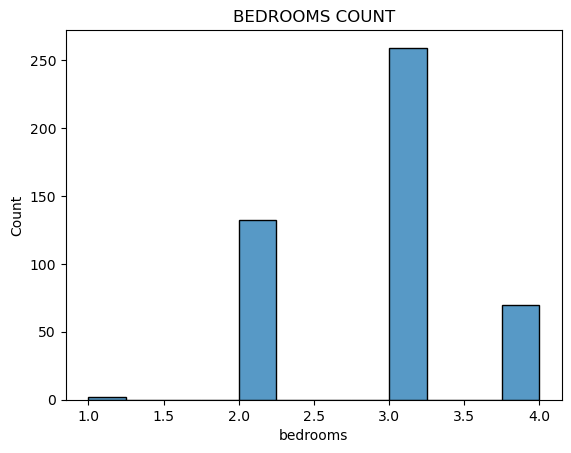

In [251]:
print(df['bedrooms'].value_counts())
sns.histplot(df['bedrooms'])
plt.title('BEDROOMS COUNT')
plt.show()

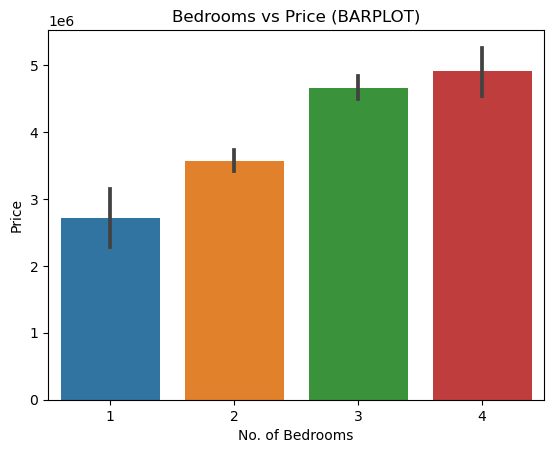

In [252]:
sns.barplot(x = df['bedrooms'] , y = df['price'])
plt.title('Bedrooms vs Price (BARPLOT)')
plt.xlabel('No. of Bedrooms')
plt.ylabel('Price')
plt.show()

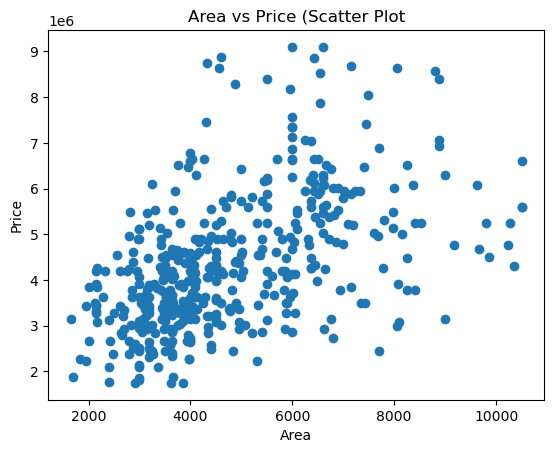

In [253]:
plt.scatter(df['area'] , df['price'] )
plt.title('Area vs Price (Scatter Plot')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

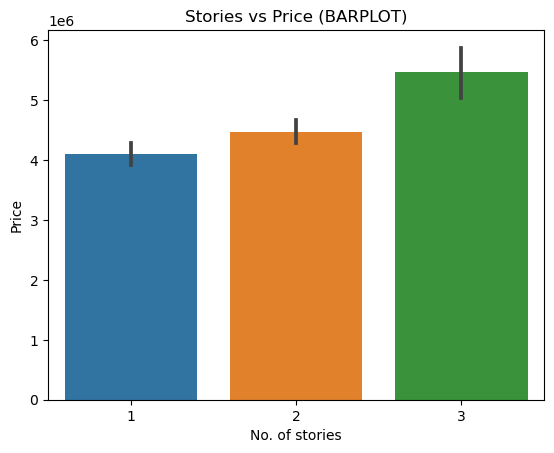

In [254]:
sns.barplot(x = df['stories'] , y = df['price'])
plt.title('Stories vs Price (BARPLOT)')
plt.xlabel('No. of stories')
plt.ylabel('Price')
plt.show()

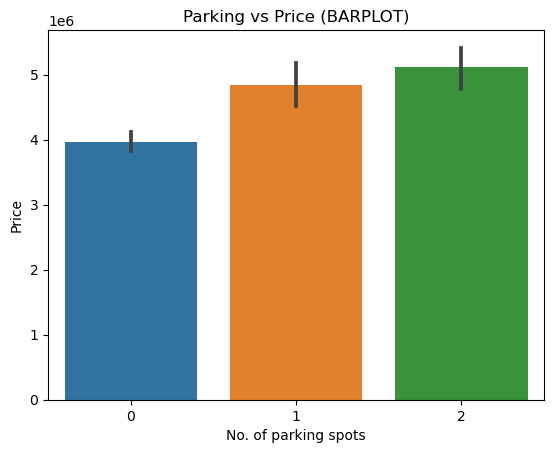

In [255]:
sns.barplot(x = df['parking'] , y = df['price'])
plt.title('Parking vs Price (BARPLOT)')
plt.xlabel('No. of parking spots')
plt.ylabel('Price')
plt.show()